In [2]:
path=r"https://www.allaboutcircuits.com/uploads/articles/four_major_filters.jpg"

# import kaggle data into colab
! pip install kaggle <br>
! mkdir ~/.kaggle <br>
! cp kaggle.json ~/.kaggle/ <br>
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c liverpool-ion-switching <br>
!mkdir /content/unzipdata/ <br>
!unzip /content/liverpool-ion-switching.zip -d /content/unzipdata <br>

In [3]:
import urllib.request  # URL Library
from PIL import Image
import matplotlib.pyplot as plt
  
urllib.request.urlretrieve(path,"gfg.png")
img = Image.open("gfg.png")

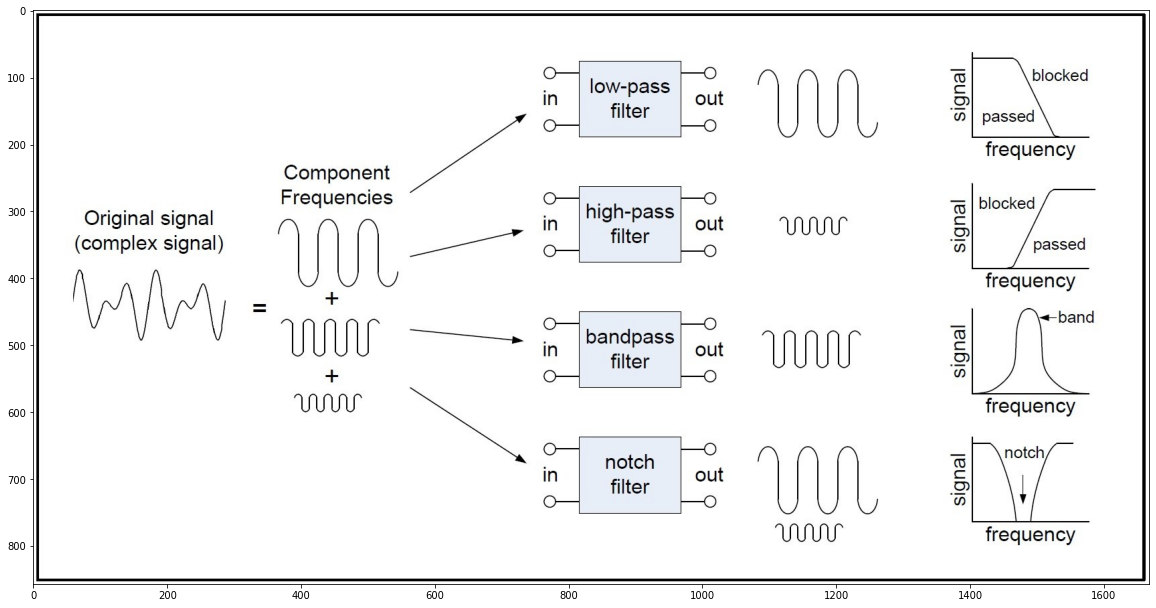

In [4]:
plt.subplots(1,1,figsize=(20,20))
plt.imshow(img)

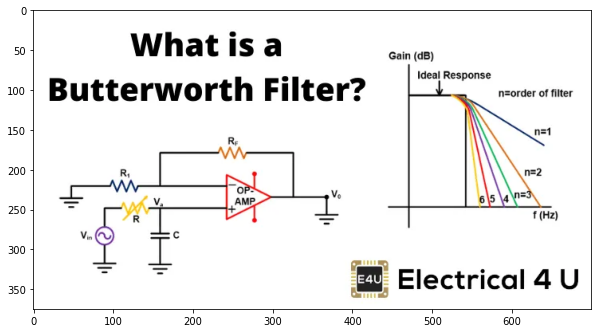

In [6]:
path2=r"https://www.electrical4u.com/wp-content/uploads/What-is-a-Butterworth-Filter.png?ezimgfmt=ng%3Awebp%2Fngcb37%2Frs%3Adevice%2Frscb37-1"
urllib.request.urlretrieve(path2,"gfg.png")
img = Image.open("gfg.png")
plt.subplots(1,1,figsize=(10,10))
plt.imshow(img)
# frequency response is flat over the passband region
# higher filter order, higher ideality of filter. flat in passband and 0 in stop band.

In [11]:
import scipy.signal

In [15]:
scipy.signal.butter(4,[10,20],"bandpass",analog=True)

(array([10000.,     0.,     0.,     0.,     0.]),
 array([1.00000000e+00, 2.61312593e+01, 1.14142136e+03, 1.82918815e+04,
        3.86568542e+05, 3.65837630e+06, 4.56568542e+07, 2.09050074e+08,
        1.60000000e+09]))

Steps to download data from kaggle in google colab 1- install kaggle
2- make a dirrctory whery u will store your kaggle_API, it will be "/.kaggle"
2.1 kaggle api will be unde: Kaggle=> Account=> Scroll down and u will find option for generate ne token. => generate new_token=> save file in dowlload section=> upload same api file in colab using drive
3- change path to "/.kaggle/"
4- make it private acces by changing mode
5- install dataset by directly copying using"copying API command to clipboard,
6- it will look like "kaggle competitions download -c liverpool-ion-switching". It is present in data section of competion.(Note: accept competion t/c beforeimporting api)



! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!pip install --upgrade --force-reinstall --no-deps kaggle

! kaggle competitions download -c liverpool-ion-switching 

<h1> Filters Definition </h1>

In [3]:
# iir filter design
#butterworth: filter have frequency response as flat as posible. order==slope to infinite
# Analog: continus signal
# digital: discrete (like 0/1)


# design an n order(degree n) filter and return its coeffcients, zeros and poles.
def butterfilter(data,order,frequencies,Type): 
    """
    order: order of filter(degree of freedom)
    frequencies: for analog( its angular, rad/sec)
    type: hight or low or..
    return filtered data
    """
    b,a=scipy.signal.butter(order,frequencies,Type) #return filter coefficients(poles and zeros) # filter designing
    fdata=scipy.signal.lfilter(b,a,data) # filter implemntation
    return fdata

In [10]:
# designing an median filter
def medfilt(data,wn):
    """
    wn: wn is window of median filter.
    return data with appling median filter on it
    """
    fdata=scipy.signal.medfilt(data, krnel_size=wn) # data must n=be in np array.
    return fdata

In [9]:
# notch filter framing for digital filter
def notch(data,low,high,order,Btype,Analog=False):
    b,a=scipy.signal.iirfilters([low,high],N=order,btype=Btype,analog=Analog)
    out=scipy.signal.lfilter(b,a,data)
    return out